#ECS 171 Project: Detecting Cyber Intrusion on IoT Traffic Data
####Completed by Matthew Armstrong, Karthik Palanisamy, Rahul Prabhu, Matthew Tom, and Kyle Tsuji
#####*Professor Solares, ECS 171: Machine Learning - UC Davis Summer 2023*


##Imports and Data Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# get dataset from github archive
!wget https://github.com/matthewarmstr/ECS-171-Project/raw/main/IoT_Intrusion.zip
!unzip IoT_Intrusion.zip

--2023-08-24 16:27:23--  https://github.com/matthewarmstr/ECS-171-Project/raw/main/IoT_Intrusion.zip
Resolving github.com (github.com)... 2607:7700:0:13:0:2:c01e:ff71, 192.30.255.113
Connecting to github.com (github.com)|2607:7700:0:13:0:2:c01e:ff71|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/matthewarmstr/ECS-171-Project/main/IoT_Intrusion.zip [following]
--2023-08-24 16:27:23--  https://raw.githubusercontent.com/matthewarmstr/ECS-171-Project/main/IoT_Intrusion.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48101046 (46M) [application/zip]
Saving to: ‘IoT_Intrusion.zip.1’

IoT_Intrusion.zip.1 100%[===================>]  45.87M  12.3MB/s    in 4.2s    

2023-08-24 16:27

In [3]:
# load data file
intru_table = pd.read_csv("IoT_Intrusion.csv")
intru_labels_removed = intru_table.drop(columns=['label'])

##Data Preprocessing

In [4]:
# complete one-hot encoding on intrusion labels
ohe = OneHotEncoder()
ohe_intru_labels = ohe.fit_transform(intru_table['label'].values.reshape(-1,1)).toarray()

# normalize traffic attribute data
scaler = MinMaxScaler()
norm_intru_labels_removed = pd.DataFrame(scaler.fit_transform(intru_labels_removed), columns=['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
                                                                                              'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
                                                                                             'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number',
                                                                                             'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP',
                                                                                             'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP',
                                                                                             'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size',
                                                                                             'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight'])
norm_intru_with_classes = norm_intru_labels_removed
norm_intru_with_classes['label'] = intru_table['label']

/Users/rahul_prabhu/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/rahul_prabhu/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/rahul_prabhu/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/rahul_prabhu/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/rahul_prabhu/.pyenv/versions/3.10.0/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/rahul_prabhu/.pyenv/ver

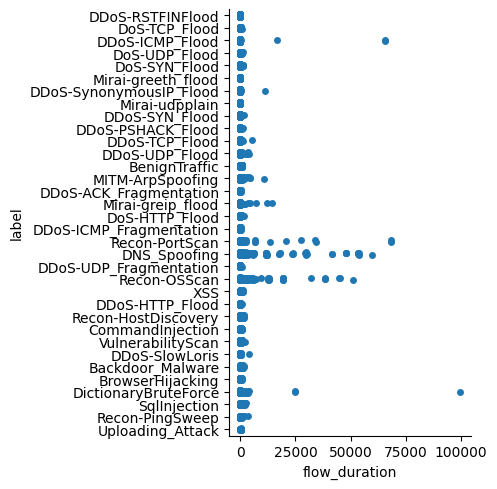

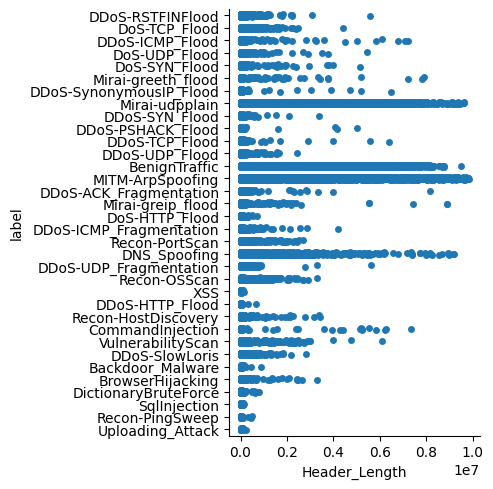

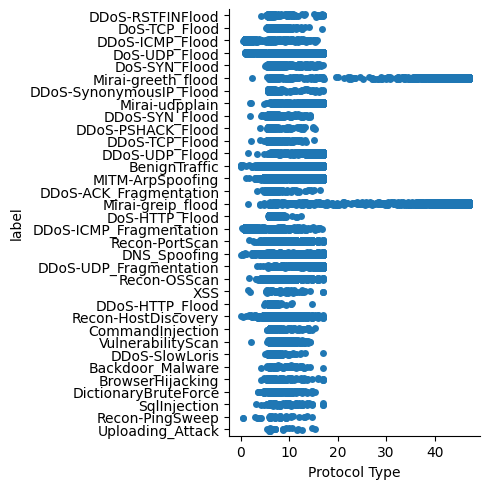

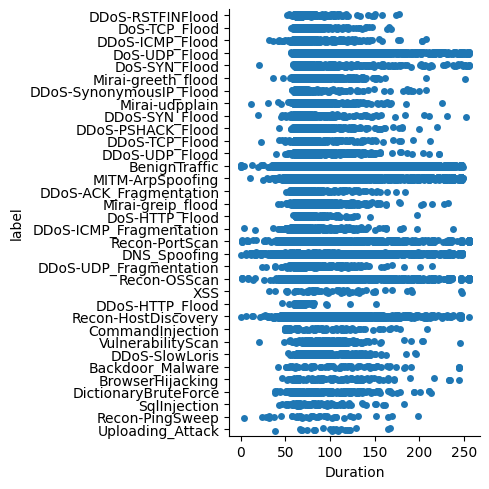

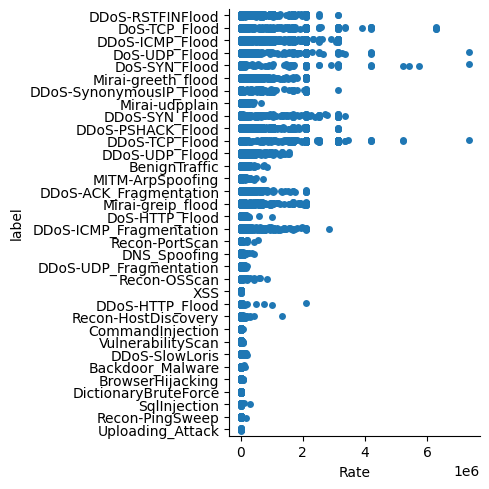

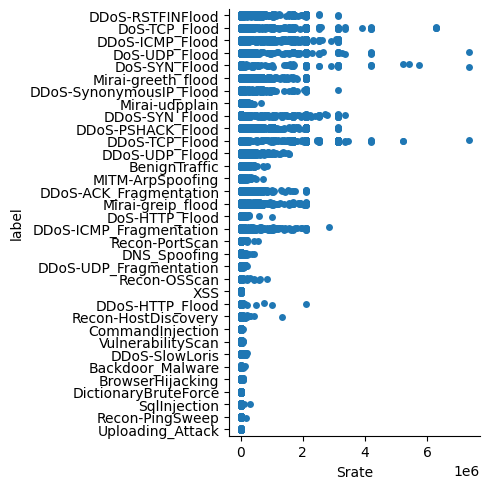

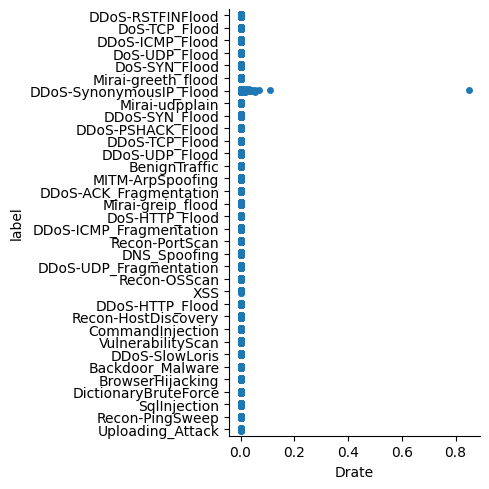

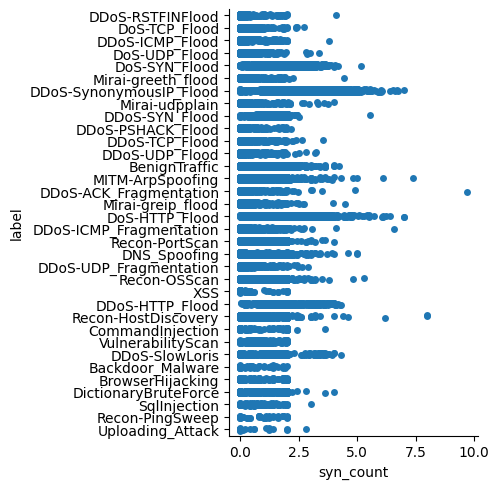

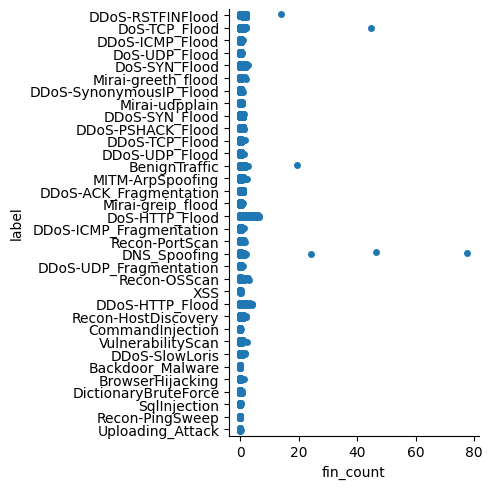

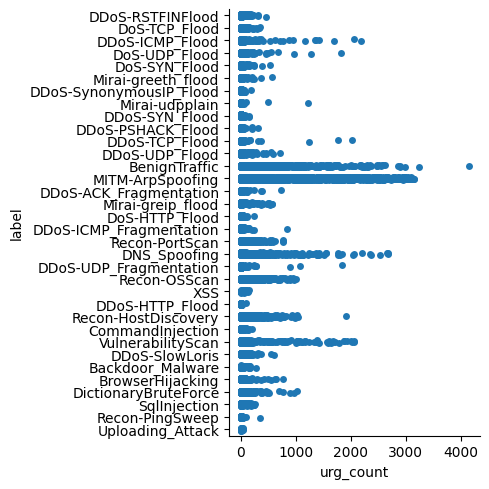

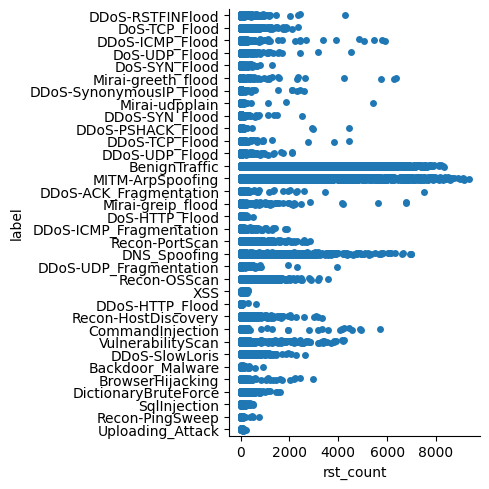

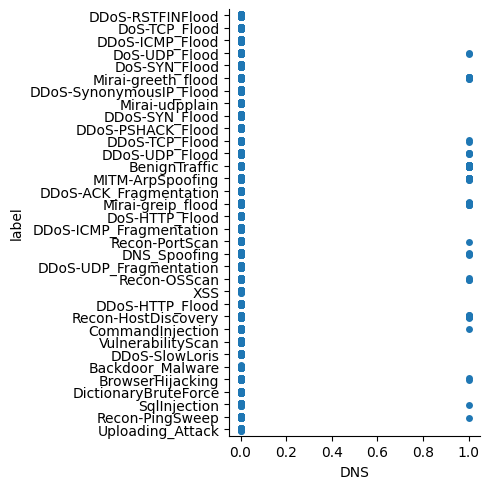

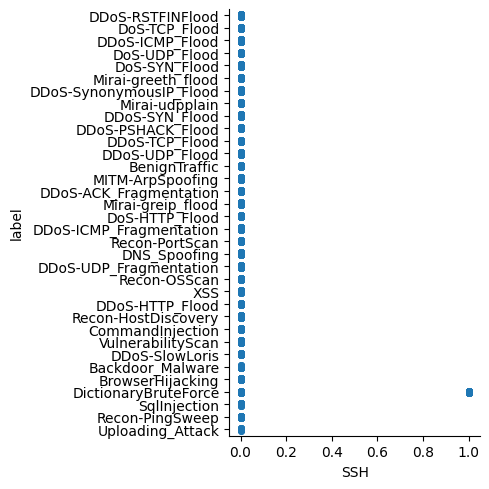

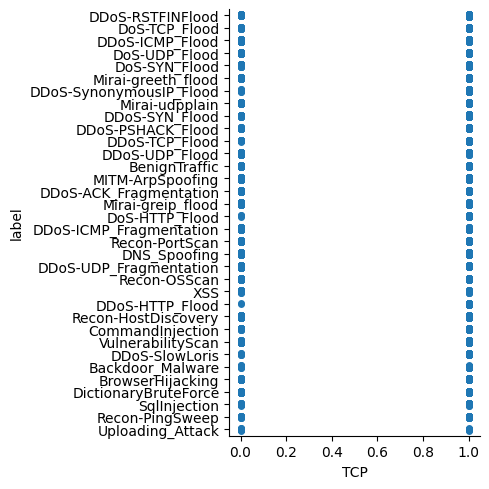

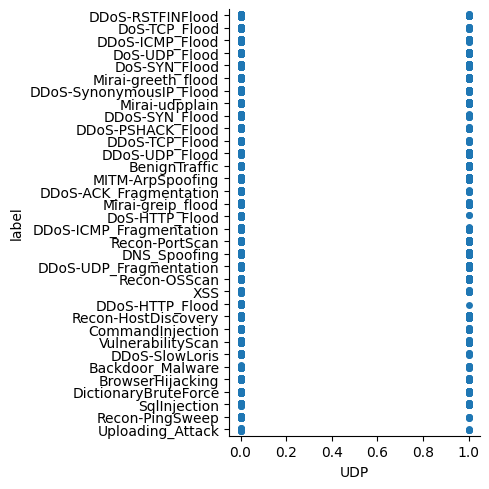

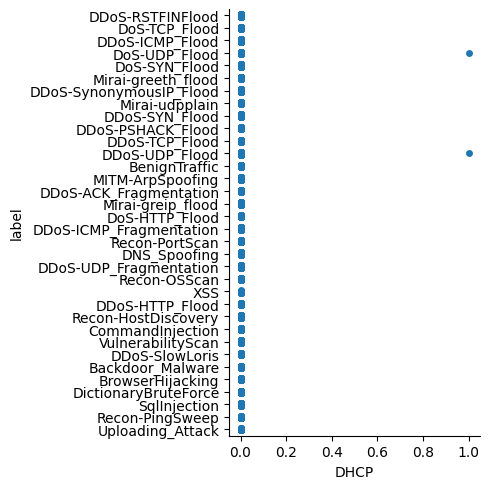

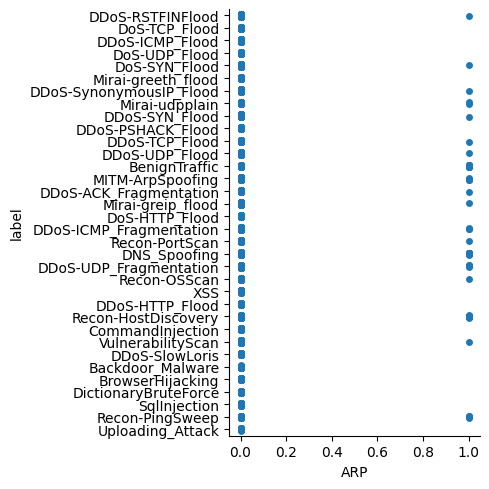

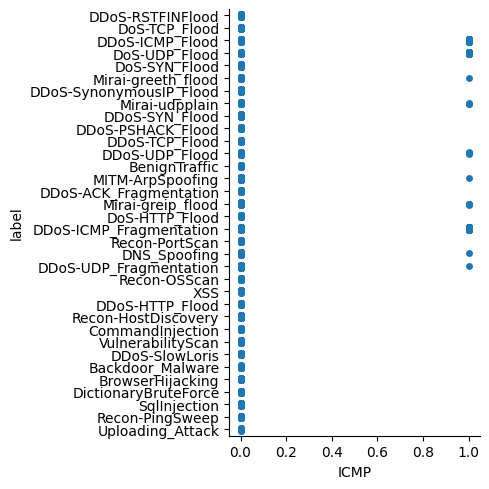

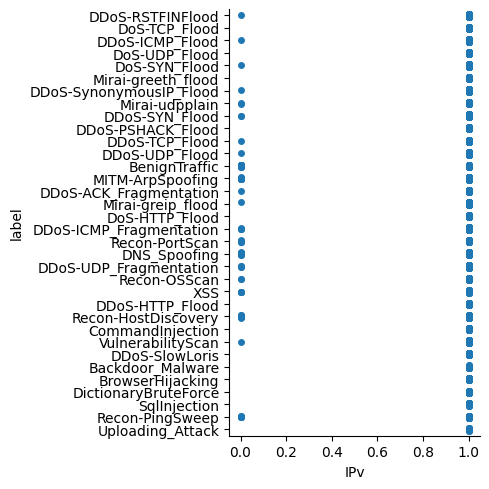

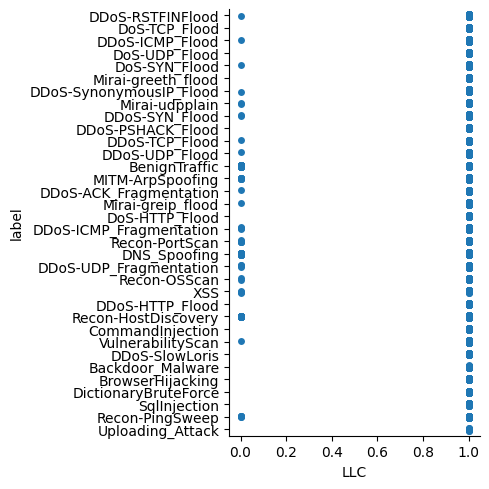

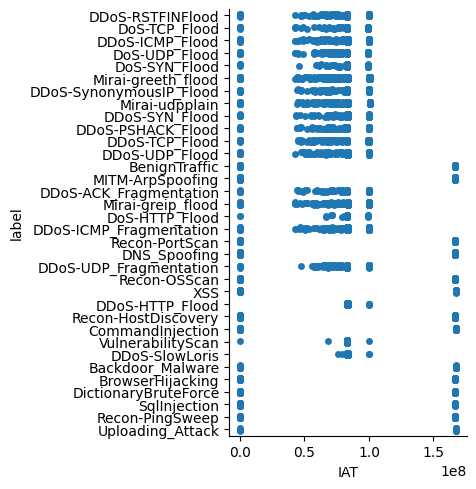

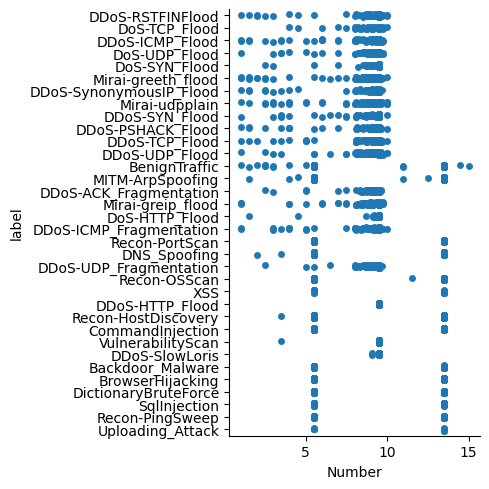

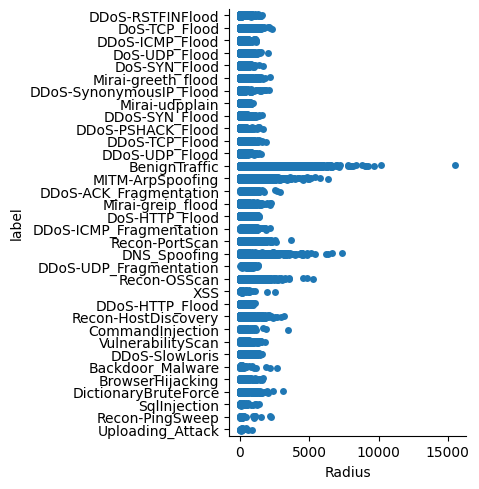

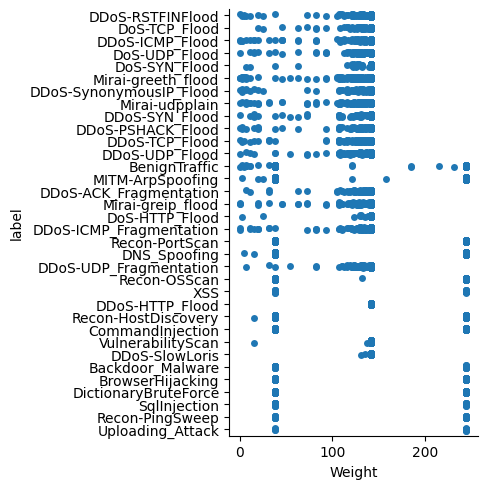

In [28]:
# we decided to remove the following attributes since they provide no meaningful contributions to the model
exclude = ['SMTP', 'Telnet', 'IRC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'label', 'Covariance', 'Variance']

relevant = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
         'syn_count', 'fin_count', 'urg_count', 'rst_count', 'IPv', 'LLC', 'DNS', 'SSH', 'TCP', 'UDP',
         'DHCP', 'ARP', 'ICMP', 'IAT', 'Number', 'Mangitue', 'Radius', 'Weight']
for name in intru_table.columns:
    if name in relevant:
        sns.catplot(intru_table, x=name, y='label')
